In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
star_df = pd.read_csv("star_classification.csv")

In [3]:
star_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [4]:
star_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
star_df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [6]:
star_df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [7]:
lb = LabelEncoder()
star_df['class_encoded']=lb.fit_transform(star_df['class'])
star_df[['class','class_encoded']]

,class,class_encoded
0,GALAXY,0
1,GALAXY,0
2,GALAXY,0
3,GALAXY,0
4,GALAXY,0
...,...,...
99995,GALAXY,0
99996,GALAXY,0
99997,GALAXY,0
99998,GALAXY,0


<AxesSubplot:xlabel='class', ylabel='count'>

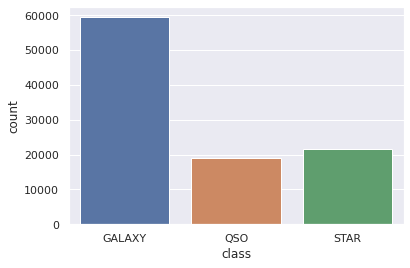

In [8]:
sns.countplot(x='class',data=star_df)

In [9]:
star_df.drop(columns =['class','MJD','field_ID','run_ID','obj_ID','cam_col','fiber_ID','spec_obj_ID','rerun_ID'],inplace=True)
star_df

,alpha,delta,u,g,r,i,z,redshift,plate,class_encoded
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,0
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374,0
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626,0
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764,0
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751,0


<AxesSubplot:>

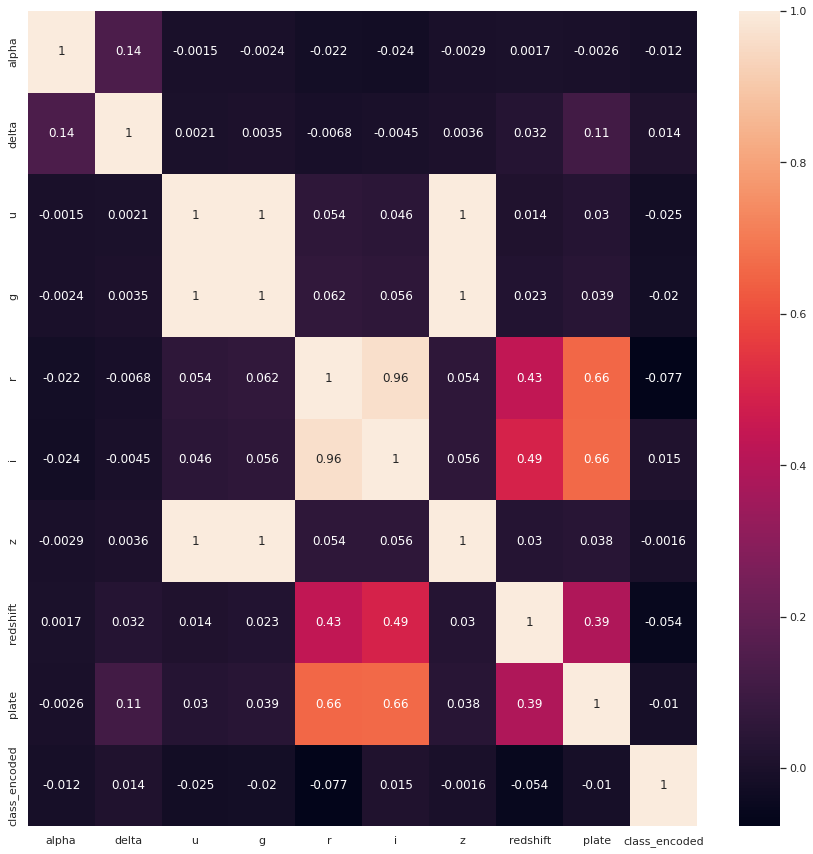

In [10]:
corr_mtx = star_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mtx,annot=True)

In [11]:
corr_mtx['class_encoded'].sort_values()

r               -0.076766
redshift        -0.054239
u               -0.024645
g               -0.020066
alpha           -0.011756
plate           -0.010060
z               -0.001614
delta            0.014452
i                0.015028
class_encoded    1.000000
Name: class_encoded, dtype: float64

In [12]:
X = star_df.drop(columns=['class_encoded'])
y = star_df['class_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [13]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
models = [DecisionTreeClassifier(),
          RandomForestClassifier(), 
          svm.SVC(),
          GaussianNB()]

for model in models:
    print()
    print(model)   
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("train accuracy:", accuracy_score(y_train_pred,y_train))
    print("test accuracy:", accuracy_score(y_test_pred,y_test))
    print(classification_report(y_test_pred,y_test))


DecisionTreeClassifier()
train accuracy: 1.0
test accuracy: 0.911060606060606
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     20020
           1       0.80      0.82      0.81      6166
           2       0.94      0.98      0.96      6814

    accuracy                           0.91     33000
   macro avg       0.89      0.90      0.90     33000
weighted avg       0.91      0.91      0.91     33000


RandomForestClassifier()


In [ ]:
gb = models[3]

In [ ]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_grid = GridSearchCV(gb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nb_grid.fit(X_train, y_train)

In [ ]:
nb_grid.best_params_

In [ ]:
nb_best = nb_grid.best_estimator_
nb_best

In [ ]:
nb_best_pred = nb_best.predict(X_test)
print("test accuracy:", accuracy_score(nb_best_pred,y_test))
print(classification_report(nb_best_pred,y_test))